In [4]:
from tensorflow.keras.datasets import mnist

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Import Keras libraries and packages
from tensorflow.keras.models import Sequential  #用來啟動 NN
from tensorflow.keras.layers import Conv2D  # Convolution Operation
from tensorflow.keras.layers import MaxPooling2D # Pooling
from tensorflow.keras.layers import Flatten #
from tensorflow.keras.layers import Dense # Fully Connected Networks
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model


In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#扁平化
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


# 資料分布


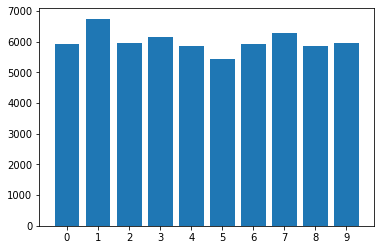

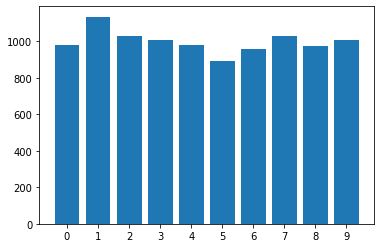

In [15]:

labels, counts = np.unique(y_train, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.show()


labels, counts = np.unique(y_test, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.show()

# One hot encoding
## 由於需要輸出10個預測數字(0~9)
## 故將0-9的數值轉換為label樣式

### One-hot在數位電路中被用來表示一種特殊的位元組合，該位元組裏，僅容許單一位元爲1，其他位元都必須爲0。之所以稱爲one-hot就是因爲只能有一個1。

## 這個也常用在其他機器學習之中，例如將字元轉換為輸入值時，可以透過此方法來做。EX:bag of word

### 今天有0~3 需要4個位數，因為有四個數字 0 1 2 3
### 若我的數字為3 經過此轉換後即變為 0 0 0 1

### 以本例子來說，目前需要判定10種數字 0~9 
### 即需要10個位數來分別代表。

In [3]:
y_train_onthot = tf.keras.backend.one_hot(
    y_train, 10
)

y_test_onthot = tf.keras.backend.one_hot(
    y_test, 10
)

In [4]:
np.shape(y_train_onthot)

TensorShape([60000, 10])

## 看一下圖片的樣子 
# index 可以替換為 0 ~ 59999

1


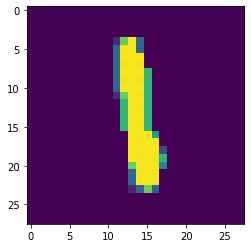

In [5]:
#due to picture pixels so change shape to 28*28
index = 200
plt.imshow(np.reshape(x_train[index],[28,28]))
print(y_train[index])

# Optimize
## Using Gradient Descent for example.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/db/Gradient_ascent_%28contour%29.png/350px-Gradient_ascent_%28contour%29.png">

# Classification
<img src="https://i.ytimg.com/vi/fZAZUYEeIMg/maxresdefault.jpg" >

<<source:台大李弘毅教授 ML lecture 4 : classification>>

# Artificial Neural Network
<img src="https://upload.wikimedia.org/wikipedia/commons/4/46/Colored_neural_network.svg" />

In [ ]:
model = Sequential()  

# INPUT LAYER & HIDDEN LAYER 
model.add(Dense(units=4096, activation = 'relu', input_shape=(784,)))
# OUTPUT LAYER
model.add(Dense(units=10, activation = 'relu'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(x=x_train,y=y_train_onthot, batch_size=3000, epochs=10)

In [ ]:
results = model.evaluate(x_test, y_test_onthot, batch_size=128)

# cross entropy
<img src="https://ml-cheatsheet.readthedocs.io/en/latest/_images/cross_entropy.png"/>

<img src="https://ithelp.ithome.com.tw/upload/images/20171206/20001976yeCo1PvEOs.jpg" />

In [ ]:
print(x_train[0].shape)

## ↑↑↑
## --由於資料集為1d array[784] 輸入後需轉換為圖片的3d array [28,28,1]--
## [長,寬,channel(rgb)]
## 而此張圖為bit map 也就是只有 0 與 1 的灰階圖片，故後面channel為1

In [ ]:
#example of VGG19
model = Sequential()  

model.add(tf.keras.layers.Reshape((28, 28,1), input_shape=(784,)))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(Conv2D(64, (3, 3), activation = 'relu',padding='same'))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3), activation = 'relu',padding='same'))
model.add(Conv2D(128,(3,3), activation = 'relu',padding='same'))
model.add(MaxPooling2D(pool_size = (2, 2)))


model.add(Conv2D(256,(3,3), activation = 'relu',padding='same'))
model.add(Conv2D(256,(3,3), activation = 'relu',padding='same'))
model.add(Conv2D(256,(3,3), activation = 'relu',padding='same'))
model.add(Conv2D(256,(3,3), activation = 'relu',padding='same'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(512,(3,3), activation = 'relu',padding='same'))
model.add(Conv2D(512,(3,3), activation = 'relu',padding='same'))
model.add(Conv2D(512,(3, 3), activation = 'relu',padding='same'))
model.add(Conv2D(512,(3, 3), activation = 'relu',padding='same'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(units=4096, activation = 'relu'))
model.add(Dense(units=1000, activation = 'relu'))
model.add(Dense(units=10, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(x=x_train,y=y_train_onthot, batch_size=3000, epochs=10)

In [ ]:
results = model.evaluate(x_test, y_test_onthot, batch_size=128)

# 直接使用keras內建模型
### 以Resnet舉例

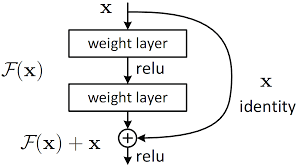


In [43]:

input_tensor = Input(shape=(28, 28,3))

Resnet50 = tf.keras.applications.ResNet50(
input_tensor=input_tensor
,include_top = True
,weights = None
, classes=10
#, classifier_activation='softmax'
)


In [44]:
Resnet50.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [45]:
x_train_stacked = np.stack((x_train,)*3, axis=-1)
x_train_stacked = np.reshape(x_train_stacked,[-1,28,28,3])
print(x_train_stacked.shape)

x_test_stacked = np.stack((x_test,)*3, axis=-1)
x_test_stacked = np.reshape(x_test_stacked,[-1,28,28,3])
print(x_test_stacked.shape)

(60000, 28, 28, 3)
(10000, 28, 28, 3)


In [46]:
#.fit(x=x_train,y=y_train_onthot, batch_size=3000, epochs=10)
Resnet50.fit(x_train_stacked,y=y_train_onthot, batch_size=3000, epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 15s 244us/sample - loss: 0.2240 - accuracy: 0.9360
Epoch 2/3
60000/60000 [==============================] - 8s 133us/sample - loss: 0.0276 - accuracy: 0.9903
Epoch 3/3
60000/60000 [==============================] - 8s 133us/sample - loss: 0.0104 - accuracy: 0.9965


In [47]:
#.fit(x=x_train,y=y_train_onthot, batch_size=3000, epochs=10)
Resnet50.evaluate(x_test_stacked, y_test_onthot, batch_size=3000)

10000/10000 [==============================] - 1s 116us/sample - loss: 0.3765 - accuracy: 0.9000


[0.376468825340271, 0.9]

# 複雜度 與 泛化能力
## (天下沒有白吃的午餐, no free lunch)
<img src="https://d1dwq032kyr03c.cloudfront.net/upload/images/20181020/20112540fLYimc78gu.png">

# Generative adversarial networks(gan)

<img src="https://miro.medium.com/max/2812/1*cxnqsjXYP-lx-3afYsuxXQ.png">

In [153]:

from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation, ZeroPadding2D
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import UpSampling2D, Conv2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt
import sys
import numpy as np

class GAN():
    def __init__(self,number=0):
        # Input shape
        self.img_rows = 28
        self.img_cols = 28
        self.channels = 1
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        
        self.number =number
        self.latent_dim = 100

        optimizer = Adam(0.0002, 0.5)

        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy'])

        # Build the generator
        self.generator = self.build_generator()

        # The generator takes noise as input and generates imgs
        z = Input(shape=(self.latent_dim,))
        img = self.generator(z)

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated images as input and determines validity
        valid = self.discriminator(img)

        # The combined model  (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, valid)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)

    def build_generator(self):

        model = Sequential()

        model.add(Dense(128 * 7 * 7, activation="relu", input_dim=self.latent_dim))
        model.add(Reshape((7, 7, 128)))
        model.add(UpSampling2D())
        model.add(Conv2D(128, kernel_size=3, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))
        model.add(UpSampling2D())
        model.add(Conv2D(64, kernel_size=3, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))
        model.add(Conv2D(self.channels, kernel_size=3, padding="same"))
        model.add(Activation("tanh"))

        model.summary()

        noise = Input(shape=(self.latent_dim,))
        img = model(noise)

        return Model(noise, img)

    def build_discriminator(self):

        model = Sequential()

        model.add(Conv2D(32, kernel_size=3, strides=2, input_shape=self.img_shape, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Conv2D(64, kernel_size=3, strides=2, padding="same"))
        model.add(ZeroPadding2D(padding=((0,1),(0,1))))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Conv2D(256, kernel_size=3, strides=1, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Flatten())
        model.add(Dense(1, activation='sigmoid'))

        model.summary()

        img = Input(shape=self.img_shape)
        validity = model(img)

        return Model(img, validity)

    def train(self, epochs, batch_size=128):

        # Load the dataset
        (X_train, Y_train), (_, _) = mnist.load_data()
        indices = [index for index,f in enumerate(Y_train)  if f == self.number]
        X_train = X_train[indices]
        Y_train = Y_train[indices]
        # Rescale -1 to 1
        X_train = X_train / 127.5 - 1.
        X_train = np.expand_dims(X_train, axis=3)

        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        for epoch in range(1,epochs+1):

            # ---------------------
            #  Train Discriminator
            # ---------------------

            # Select a random half of images
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs = X_train[idx]

            # Sample noise and generate a batch of new images
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
            gen_imgs = self.generator.predict(noise)

            # Train the discriminator (real classified as ones and generated as zeros)
            imgs = np.concatenate((imgs,gen_imgs), axis=0)
            labels = np.concatenate((valid,fake),axis=0)
            
            indices = [f for f in range(len(imgs))]
            np.random.shuffle(indices)
            
            imgs = np.array(imgs)[indices]
            labels = np.array(labels)[indices]
            
            d_loss = self.discriminator.train_on_batch(imgs, labels)
#             d_loss_real = self.discriminator.train_on_batch(imgs, valid)
#             d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)
#             d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # ---------------------
            #  Train Generator
            # ---------------------

            # Train the generator (wants discriminator to mistake images as real)
            g_loss = self.combined.train_on_batch(noise, valid)

            # Plot the progress
            if epoch %10 ==0:
                print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

    def plt_fake_imgs(self):
        r, c = 5, 5
        noise = np.random.normal(0, 1, (r * c, gan.latent_dim))
        gen_imgs = gan.generator.predict(noise)

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5
        for i in range(r*c):
            plt.imshow(gen_imgs[i])
            plt.show()


In [160]:

gan = GAN(5)
gan.train(epochs=100, batch_size=5000)

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_168 (Conv2D)          (None, 14, 14, 32)        320       
_________________________________________________________________
leaky_re_lu_96 (LeakyReLU)   (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_88 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_169 (Conv2D)          (None, 7, 7, 64)          18496     
_________________________________________________________________
zero_padding2d_24 (ZeroPaddi (None, 8, 8, 64)          0         
_________________________________________________________________
batch_normalization_110 (Bat (None, 8, 8, 64)          256       
_________________________________________________________________
leaky_re_lu_97 (LeakyReLU)   (None, 8, 8, 64)        

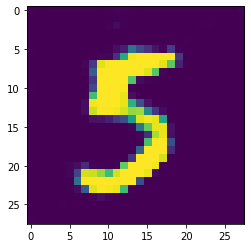

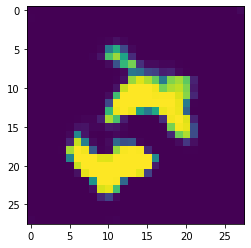

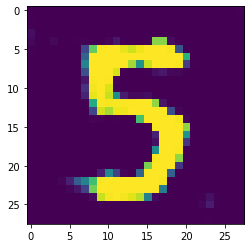

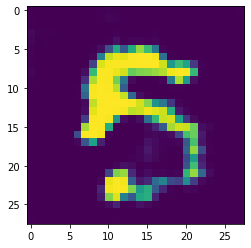

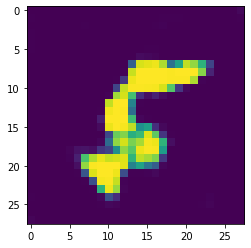

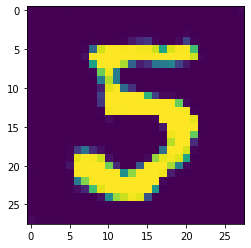

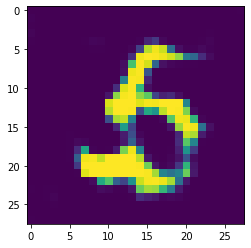

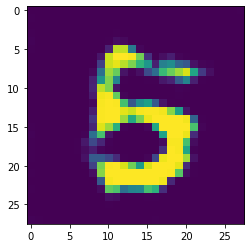

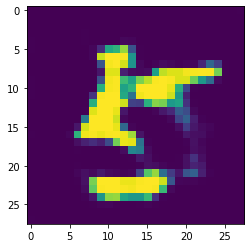

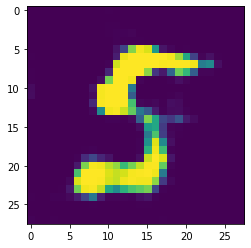

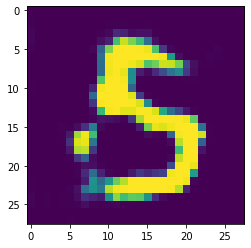

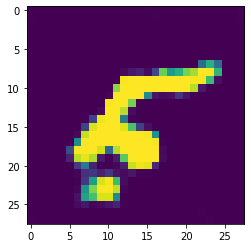

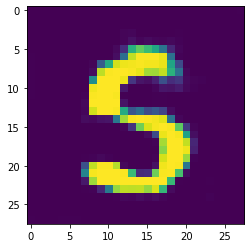

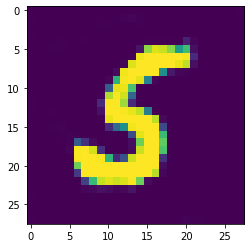

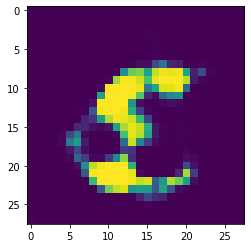

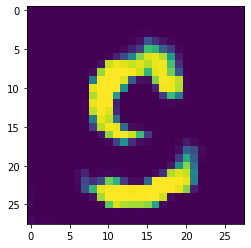

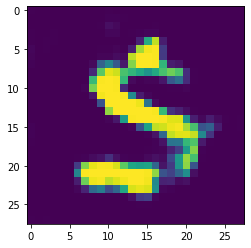

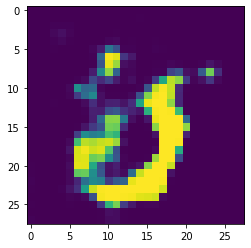

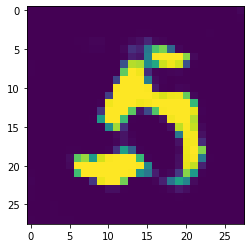

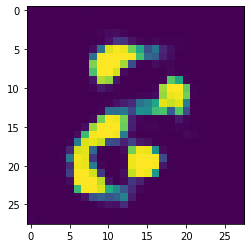

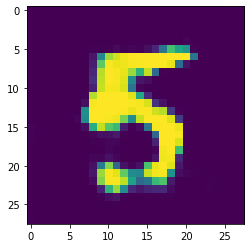

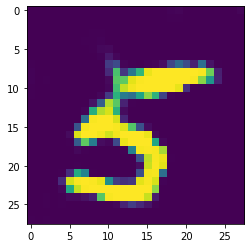

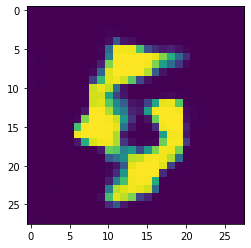

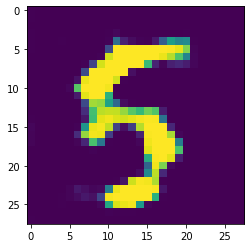

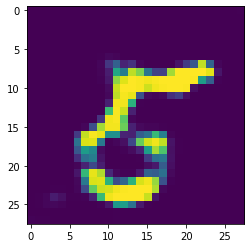

In [161]:
gan.plt_fake_imgs()

# 繼續學習管道

## 教育部人工智慧技術及應用人才培育計畫 - 系列課程
### 線上教育課程，免費觀看
https://idea.cs.nthu.edu.tw/~AIcoursemap/home/courses-chinese.html

## 台大教授 李弘毅
### 基礎觀念、數學、基本神經網路、進階神經網路
https://www.youtube.com/channel/UC2ggjtuuWvxrHHHiaDH1dlQ

## AI科普獎座
### 有趣科學科普知識
https://highscope.ch.ntu.edu.tw/wordpress/?cat=11489